In [10]:
%run Global.ipynb
%run Helper_Functions.ipynb

In [12]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression

## 50 features

In [11]:
train_df_ohe_selected = pd.read_csv("./Final/Datasets/train_df.csv", keep_default_na=False)

y = train_df_ohe_selected.iloc[:,-1]
X = train_df_ohe_selected.iloc[:,:-1]

In [13]:
logr = LogisticRegression(solver='sag') # uses Stochastic Average Gradient descent solver

In [14]:
param_grid = {'max_iter': [50,100,150]}
cv_results = tune_hyperparameter(logr, param_grid, X, y, cv=3)
cv_results
# max_iter>=500 works well

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END ........................................max_iter=50; total time=   5.0s
[CV] END ........................................max_iter=50; total time=   5.5s
[CV] END ........................................max_iter=50; total time=   6.9s
[CV] END .......................................max_iter=100; total time=   5.4s
[CV] END .......................................max_iter=100; total time=   6.1s
[CV] END .......................................max_iter=100; total time=   5.2s
[CV] END .......................................max_iter=150; total time=   5.9s
[CV] END .......................................max_iter=150; total time=   6.2s
[CV] END .......................................max_iter=150; total time=   5.2s


,params,mean_test_3.0_precision,std_test_3.0_precision,rank_test_3.0_precision,mean_test_3.0_recall,std_test_3.0_recall,rank_test_3.0_recall,mean_test_3.0_f1-score,std_test_3.0_f1-score,rank_test_3.0_f1-score,...,rank_test_5.0_precision,mean_test_5.0_recall,std_test_5.0_recall,rank_test_5.0_recall,mean_test_5.0_f1-score,std_test_5.0_f1-score,rank_test_5.0_f1-score,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,{'max_iter': 50},0.706472,0.013357,1,0.150068,0.000895,1,0.247542,0.001786,1,...,1,0.069627,0.009897,1,0.127616,0.016989,1,0.727832,0.000856,1
1,{'max_iter': 100},0.706472,0.013357,1,0.150068,0.000895,1,0.247542,0.001786,1,...,1,0.069627,0.009897,1,0.127616,0.016989,1,0.727832,0.000856,1
2,{'max_iter': 150},0.706472,0.013357,1,0.150068,0.000895,1,0.247542,0.001786,1,...,1,0.069627,0.009897,1,0.127616,0.016989,1,0.727832,0.000856,1


LogisticRegression prediction took 70.39257097244263 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.721854    0.185690      0.295393       0.734295    0.973473   
1       0.717391    0.168654      0.273103       0.732747    0.975941   
2       0.673333    0.172355      0.274457       0.731844    0.969772   
3       0.686131    0.160410      0.260028       0.731787    0.972856   
4       0.780142    0.187713      0.302613       0.736427    0.979025   
5       0.656489    0.146758      0.239888       0.729592    0.970389   
6       0.741667    0.151877      0.252125       0.731371    0.980876   
7       0.728571    0.174061      0.280992       0.734571    0.976558   
8       0.731544    0.185690      0.296196       0.734760    0.974691   
9       0.692857    0.165247      0.266850       0.731787    0.973457   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.837135       0.714286    0.050505      0.094340  0.7334

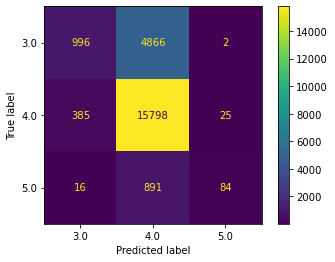

,mean,std
3.0_precision,0.712998,0.036375
3.0_recall,0.169846,0.014193
3.0_f1-score,0.274164,0.020295
4.0_precision,0.732918,0.002042
4.0_recall,0.974704,0.003515
4.0_f1-score,0.836691,0.002245
5.0_precision,0.760686,0.098976
5.0_recall,0.084788,0.026230
5.0_f1-score,0.151454,0.041900
accuracy,0.731822,0.003996


In [15]:
logr = LogisticRegression(solver='sag', max_iter=50, random_state=30027)
logr.fit(X, y)
cross_val_report(logr, X, y)[1]

## 300 features

LogisticRegression prediction took 128.30999898910522 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.656863    0.228279      0.338812       0.740935    0.958051   
1       0.682635    0.194208      0.302387       0.737312    0.967921   
2       0.686391    0.197952      0.307285       0.736620    0.967921   
3       0.622642    0.168942      0.265772       0.731673    0.960518   
4       0.728814    0.220137      0.338139       0.742439    0.969155   
5       0.677019    0.186007      0.291834       0.735557    0.966070   
6       0.671233    0.167235      0.267760       0.732618    0.968538   
7       0.642045    0.192833      0.296588       0.736321    0.962986   
8       0.683616    0.206133      0.316754       0.737016    0.963580   
9       0.656977    0.192504      0.297760       0.735751    0.964198   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.835620       0.714286    0.050505      0.094340  0.733

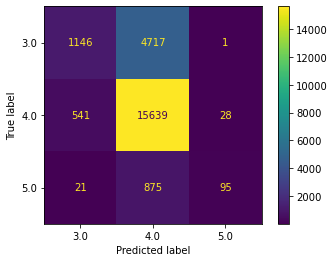

,mean,std
3.0_precision,0.670823,0.028835
3.0_recall,0.195423,0.019472
3.0_f1-score,0.302309,0.024814
4.0_precision,0.736624,0.003259
4.0_recall,0.964894,0.003696
4.0_f1-score,0.835441,0.002553
5.0_precision,0.781429,0.101276
5.0_recall,0.095889,0.024478
5.0_f1-score,0.169424,0.038851
accuracy,0.731908,0.004725


In [7]:
# 300 features
train_df_ohe_selected = pd.read_csv("./Final/Datasets/train_df_300.csv", keep_default_na=False)

y = train_df_ohe_selected.iloc[:,-1]
X = train_df_ohe_selected.iloc[:,:-1]

logr = LogisticRegression(solver='sag', max_iter=50, random_state=30027)
logr.fit(X, y)
cross_val_report(logr, X, y)[1]

## Using selected features from 300 features

In [20]:
selector = SelectFromModel(logr, prefit=True).fit(X, y)
print("LogR Coefficients:", selector.estimator_.coef_)
print("Selector threshold:", selector.threshold_)
selected_features = [X.columns[i] for i in range(X.shape[1]) if selector.get_support()[i]]
print(len(selected_features), "features selected")
X_filtered = X[selected_features]

LogR Coefficients: [[ 1.81017756e+00  5.06716768e-03  4.16578365e-02 ...  1.68507896e-01
  -2.33456361e-01  9.48739482e-01]
 [-1.16858592e+00 -3.06978037e-02  3.19729234e-03 ...  1.03174751e-01
   2.34755725e-01  1.31449755e-01]
 [-6.41591640e-01  2.56306360e-02 -4.48551288e-02 ... -2.71682647e-01
  -1.29936314e-03 -1.08018924e+00]]
Selector threshold: 1.359023438646688
524 features selected


LogisticRegression prediction took 51.60170078277588 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.743243    0.187394      0.299320       0.736034    0.975324   
1       0.725191    0.161840      0.264624       0.732225    0.978408   
2       0.767606    0.186007      0.299451       0.737819    0.980876   
3       0.752294    0.139932      0.235971       0.728650    0.979025   
4       0.798450    0.175768      0.288112       0.735118    0.982727   
5       0.766667    0.156997      0.260623       0.732505    0.981493   
6       0.729508    0.151877      0.251412       0.730327    0.979025   
7       0.764286    0.182594      0.294766       0.737454    0.979025   
8       0.800000    0.177172      0.290098       0.735675    0.982716   
9       0.721311    0.149915      0.248237       0.729829    0.977160   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.838949       0.727273    0.080808      0.145455  0.7364

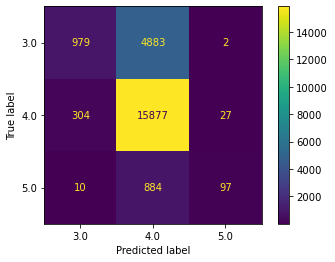

,mean,std
3.0_precision,0.756855,0.028045
3.0_recall,0.166949,0.016933
3.0_f1-score,0.273261,0.023711
4.0_precision,0.733563,0.003295
4.0_recall,0.979578,0.002388
4.0_f1-score,0.838903,0.002518
5.0_precision,0.786726,0.122511
5.0_recall,0.097889,0.015145
5.0_f1-score,0.173379,0.024240
accuracy,0.735073,0.004547


In [22]:
logr.fit(X_filtered, y)
cross_val_report(logr, X_filtered, y)[1]

In [9]:
selector = SelectFromModel(logr, prefit=True).fit(X, y)
print("LogR Coefficients:", selector.estimator_.coef_)
print("Selector threshold:", selector.threshold_)

LogR Coefficients: [[ 1.81017756e+00  5.06716768e-03  4.16578365e-02 ...  1.68507896e-01
  -2.33456361e-01  9.48739482e-01]
 [-1.16858592e+00 -3.06978037e-02  3.19729234e-03 ...  1.03174751e-01
   2.34755725e-01  1.31449755e-01]
 [-6.41591640e-01  2.56306360e-02 -4.48551288e-02 ... -2.71682647e-01
  -1.29936314e-03 -1.08018924e+00]]
Selector threshold: 1.359023438646688


In [28]:
logr = LogisticRegression(solver='sag', max_iter=50, random_state=30027)

thresholds = [i/10 for i in range(0, 22)]
nFeatures = []
accuracy = []
f1_3 = []
f1_4 = []
f1_5 = []
accuracy_std = []
for threshold in thresholds: 
    selector = SelectFromModel(logr, threshold=threshold).fit(X, y)
    selected_features = [X.columns[i] for i in range(X.shape[1]) if selector.get_support()[i]]
    nFeatures.append(len(selected_features))
    print(f'threshold = {threshold}: {len(selected_features)} features selected')
    X_filtered = X[selected_features]
    logr.fit(X_filtered, y)
    df = cross_val_report(logr, X_filtered, y, print_confusion_matrix=False, print_full_results=False, predict=False)[1]
    accuracy.append(df.loc['accuracy']['mean'])
    f1_3.append(df.loc['3.0_f1-score']['mean'])
    f1_4.append(df.loc['4.0_f1-score']['mean'])
    f1_5.append(df.loc['5.0_f1-score']['mean'])
    accuracy_std.append(df.loc['accuracy']['std'])

threshold = 0.0: 1108 features selected
LogisticRegression prediction took 140.09111714363098 seconds.

threshold = 0.1: 1086 features selected
LogisticRegression prediction took 126.15939617156982 seconds.

threshold = 0.2: 1066 features selected
LogisticRegression prediction took 135.6067771911621 seconds.

threshold = 0.3: 1032 features selected
LogisticRegression prediction took 115.65002012252808 seconds.

threshold = 0.4: 993 features selected
LogisticRegression prediction took 128.0643961429596 seconds.

threshold = 0.5: 946 features selected
LogisticRegression prediction took 126.78854513168335 seconds.

threshold = 0.6: 883 features selected
LogisticRegression prediction took 105.39535593986511 seconds.

threshold = 0.7: 829 features selected
LogisticRegression prediction took 108.03469800949097 seconds.

threshold = 0.8: 783 features selected
LogisticRegression prediction took 102.77078199386597 seconds.

threshold = 0.9: 732 features selected
LogisticRegression prediction to

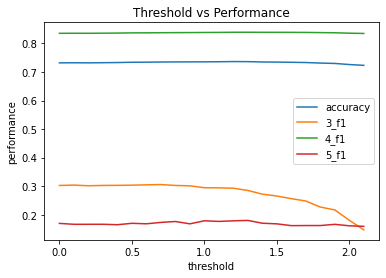

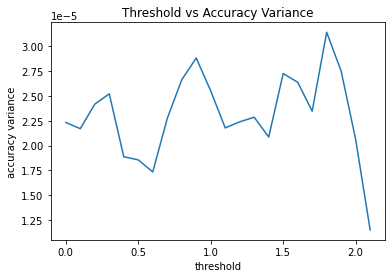

In [36]:
plt.plot(thresholds, accuracy, label = "accuracy")
plt.plot(thresholds, f1_3, label = "3_f1")
plt.plot(thresholds, f1_4, label = "4_f1")
plt.plot(thresholds, f1_5, label = "5_f1")
plt.legend()
plt.xlabel("threshold")
plt.ylabel("performance")
plt.title("Threshold vs Performance")
plt.show()

### Different feature selection

selected 50 features

LogisticRegression prediction took 73.51874589920044 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.721854    0.185690      0.295393       0.734295    0.973473   
1       0.717391    0.168654      0.273103       0.732747    0.975941   
2       0.673333    0.172355      0.274457       0.731844    0.969772   
3       0.686131    0.160410      0.260028       0.731787    0.972856   
4       0.780142    0.187713      0.302613       0.736427    0.979025   
5       0.656489    0.146758      0.239888       0.729592    0.970389   
6       0.741667    0.151877      0.252125       0.731371    0.980876   
7       0.728571    0.174061      0.280992       0.734571    0.976558   
8       0.731544    0.185690      0.296196       0.734760    0.974691   
9       0.692857    0.165247      0.266850       0.731787    0.973457   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.837135       0.714286    0.050505

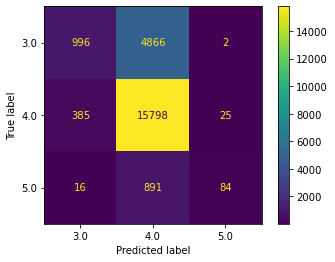

                   mean       std
3.0_precision  0.712998  0.036375
3.0_recall     0.169846  0.014193
3.0_f1-score   0.274164  0.020295
4.0_precision  0.732918  0.002042
4.0_recall     0.974704  0.003515
4.0_f1-score   0.836691  0.002245
5.0_precision  0.760686  0.098976
5.0_recall     0.084788  0.026230
5.0_f1-score   0.151454  0.041900
accuracy       0.731822  0.003996



selected 100 features

LogisticRegression prediction took 89.74640011787415 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.689024    0.192504      0.300932       0.734331    0.968538   
1       0.713333    0.182283      0.290366       0.734979    0.973473   
2       0.675159    0.180887      0.285330       0.732585    0.966687   
3       0.659722    0.162116      0.260274       0.731719    0.969155   
4       0.772727    0.203072      0.321622       0.738684    0.976558   
5       0.684211    0.155290      0.253129       0.731447    0.972856   
6       0.701493    0.1604

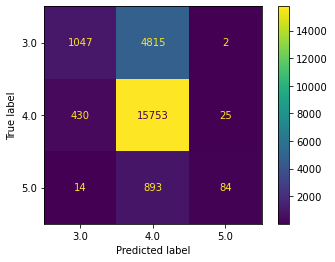

                   mean       std
3.0_precision  0.701918  0.030280
3.0_recall     0.178542  0.015673
3.0_f1-score   0.284469  0.021627
4.0_precision  0.734032  0.002197
4.0_recall     0.971927  0.003396
4.0_f1-score   0.836390  0.002234
5.0_precision  0.756782  0.111509
5.0_recall     0.084778  0.029469
5.0_f1-score   0.151337  0.048642
accuracy       0.732082  0.003936



selected 200 features

LogisticRegression prediction took 114.32790875434875 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.693989    0.216354      0.329870       0.739028    0.966070   
1       0.670732    0.187394      0.292943       0.735584    0.967921   
2       0.698795    0.197952      0.308511       0.736274    0.967921   
3       0.644295    0.163823      0.261224       0.730751    0.966070   
4       0.756098    0.211604      0.330667       0.740619    0.974090   
5       0.689189    0.174061      0.277929       0.734236    0.969772   
6       0.686131    0.160

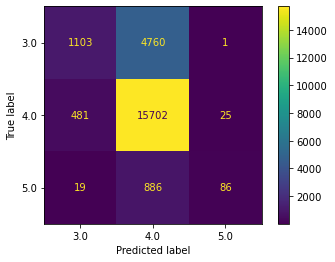

                   mean       std
3.0_precision  0.687541  0.028523
3.0_recall     0.188091  0.018742
3.0_f1-score   0.295086  0.024911
4.0_precision  0.735534  0.002852
4.0_recall     0.968781  0.003042
4.0_f1-score   0.836193  0.002345
5.0_precision  0.769241  0.106068
5.0_recall     0.086808  0.028712
5.0_f1-score   0.154831  0.047178
accuracy       0.732385  0.004247



selected 300 features

LogisticRegression prediction took 138.69750094413757 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.656863    0.228279      0.338812       0.740935    0.958051   
1       0.692771    0.195911      0.305445       0.738375    0.969772   
2       0.686047    0.201365      0.311346       0.737189    0.967304   
3       0.624204    0.167235      0.263795       0.731455    0.961135   
4       0.727273    0.218430      0.335958       0.741737    0.969155   
5       0.664596    0.182594      0.286479       0.734617    0.964837   
6       0.671233    0.167

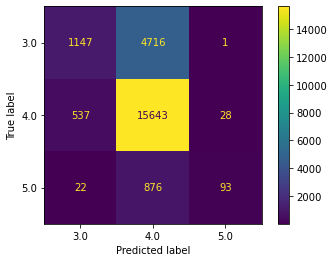

                   mean       std
3.0_precision  0.672063  0.027850
3.0_recall     0.195593  0.019892
3.0_f1-score   0.302631  0.025352
4.0_precision  0.736674  0.003315
4.0_recall     0.965141  0.003706
4.0_f1-score   0.835565  0.002595
5.0_precision  0.778035  0.102058
5.0_recall     0.093869  0.022942
5.0_f1-score   0.166239  0.036516
accuracy       0.732038  0.004721





In [9]:
logr = LogisticRegression(solver='sag', max_iter=50, random_state=30027)
train_df_50 = pd.read_csv("./Final/Datasets/train_df_50.csv", keep_default_na=False)
train_df_100 = pd.read_csv("./Final/Datasets/train_df_100.csv", keep_default_na=False)
train_df_200 = pd.read_csv("./Final/Datasets/train_df_200.csv", keep_default_na=False)
train_df_300 = pd.read_csv("./Final/Datasets/train_df_300.csv", keep_default_na=False)
nums = ['50', '100', '200', '300']
train_dfs = [pd.read_csv("./Final/Datasets/train_df_"+num+".csv", keep_default_na=False) for num in nums]

for i in range(4): 
    print("================================================================================")
    print(f'selected {nums[i]} features\n')
    train_df = train_dfs[i]
    X_train = train_df.iloc[:,:-1]
    y_train = train_df.iloc[:,-1]
    _, report = cross_val_report(logr, X_train, y_train)
    print(report)
    print('\n================================================================================\n\n')